In [ ]:
# Core
import pandas as pd
import numpy as np

# Date handling
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = "/content/drive/MyDrive/archive (2)/shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

df.head()


Mounted at /content/drive


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# Task
Perform K-Means clustering on the data to segment it into 3 clusters. Determine the optimal number of clusters using the elbow and silhouette methods.

## Prepare the data for clustering

### Subtask:
Select the relevant numerical features for clustering and scale them to ensure they have a similar range.


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = "/content/drive/MyDrive/archive (2)/shopping_behavior_updated.csv"
try:
    df = pd.read_csv(file_path)

    # Apply one-hot encoding
    categorical_cols = ['Gender', 'Category', 'Location', 'Size', 'Color', 'Season',
                        'Subscription Status', 'Shipping Type', 'Discount Applied',
                        'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    # Display the first few rows of the updated DataFrame
    display(df.head())

except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please check the file path and ensure the drive is mounted correctly.")
except Exception as e:
    print(f"An error occurred: {e}")

Mounted at /content/drive


,Customer ID,Age,Item Purchased,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Category_Clothing,Category_Footwear,Category_Outerwear,...,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,55,Blouse,53,3.1,14,True,True,False,False,...,False,False,False,True,False,False,True,False,False,False
1,2,19,Sweater,64,3.1,2,True,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3,50,Jeans,73,3.1,23,True,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3,4,21,Sandals,90,3.5,49,True,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,5,45,Blouse,49,2.7,31,True,True,False,False,...,False,False,True,False,False,False,False,False,False,False


## Prepare the data for clustering

### Subtask:
Select the relevant numerical features for clustering and scale them to ensure they have a similar range.

**Reasoning**:
Select the numerical features for clustering, scale them, and convert the scaled data back to a DataFrame.

In [ ]:
# Select numerical features for clustering, excluding 'Customer ID' and 'Item Purchased'
# 'Item Purchased' was not one-hot encoded due to many unique values and should also be excluded from numerical features for clustering
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
features_for_clustering = df[numerical_cols].drop(columns=['Customer ID'])


# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical data
scaled_features = scaler.fit_transform(features_for_clustering)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features_for_clustering.columns)

# Display the first few rows of the scaled DataFrame
display(scaled_df.head())

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,0.718913,-0.285629,-0.907584,-0.785831
1,-1.648629,0.178852,-0.907584,-1.616552
2,0.390088,0.558882,-0.907584,-0.162789
3,-1.517099,1.276716,-0.349027,1.637107
4,0.061263,-0.454531,-1.466141,0.391025


## Determine optimal number of clusters using the elbow method

### Subtask:
Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters and plot the results to find the "elbow point".

**Reasoning**:
Calculate WCSS for different numbers of clusters and plot the results to find the "elbow point".

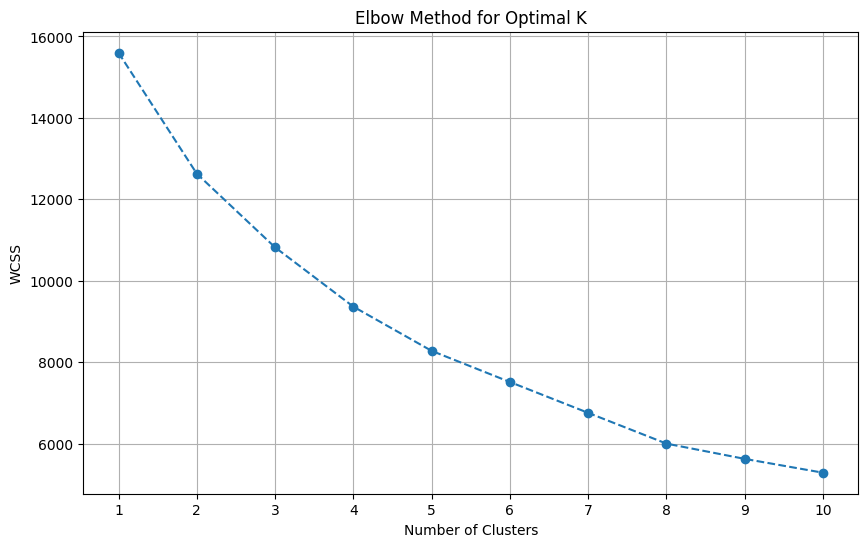

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## Determine optimal number of clusters using the silhouette method

### Subtask:
Calculate the average silhouette score for different numbers of clusters to assess the clustering quality.

**Reasoning**:
Import the silhouette_score function and calculate the silhouette scores for different numbers of clusters and then plot the scores.

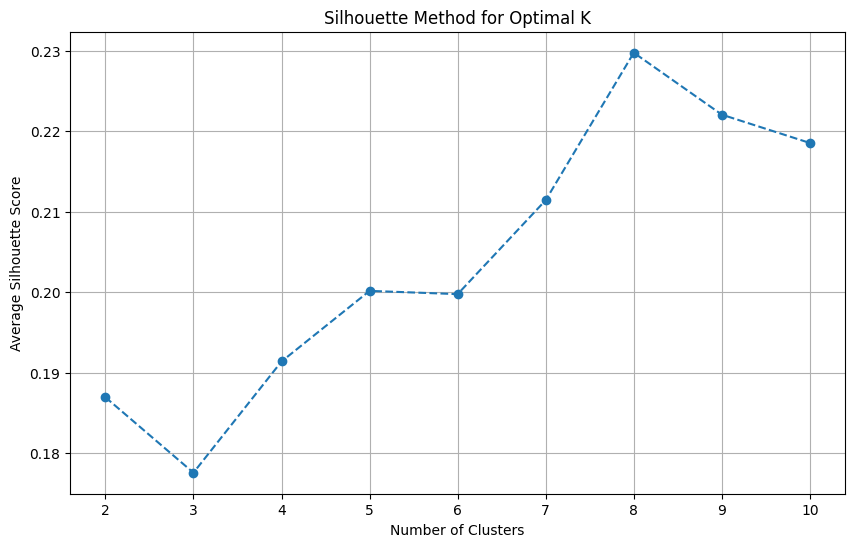

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Loop through a range of potential cluster numbers (from 2 to 10)
for n_clusters in range(2, 11):
    # Instantiate a KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)

    # Fit the KMeans model to the scaled data
    kmeans.fit(scaled_df)

    # Predict the cluster labels
    cluster_labels = kmeans.predict(scaled_df)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)

    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

## Perform k-means clustering with k=3

### Subtask:
Apply K-Means clustering with the chosen number of clusters (K=3).

**Reasoning**:
Import necessary libraries and apply K-Means clustering with n_clusters=3, then add the cluster labels to the original dataframe.

In [ ]:
from sklearn.cluster import KMeans

# Instantiate KMeans with n_clusters=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)

# Fit the KMeans model to the scaled data and predict clusters
clusters = kmeans.fit_predict(scaled_df)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Display the first few rows of the dataframe with the new 'Cluster' column
display(df.head())

,Customer ID,Age,Item Purchased,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Category_Clothing,Category_Footwear,Category_Outerwear,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,Cluster
0,1,55,Blouse,53,3.1,14,True,True,False,False,...,False,False,True,False,False,True,False,False,False,2
1,2,19,Sweater,64,3.1,2,True,True,False,False,...,False,False,False,False,False,True,False,False,False,0
2,3,50,Jeans,73,3.1,23,True,True,False,False,...,False,False,False,False,False,False,False,False,True,1
3,4,21,Sandals,90,3.5,49,True,False,True,False,...,False,True,False,False,False,False,False,False,True,0
4,5,45,Blouse,49,2.7,31,True,True,False,False,...,False,True,False,False,False,False,False,False,False,2


## Analyze and visualize the clusters

### Subtask:
Analyze the characteristics of each cluster and visualize the results to understand the segmentation.

**Reasoning**:
Load the data, apply one-hot encoding, scale the numerical features, perform KMeans clustering with k=3, and then analyze the characteristics of each cluster by grouping the original DataFrame (before scaling and encoding) and calculating descriptive statistics. Finally, create visualizations to understand the segmentation.

'Cluster Characteristics:'

,Cluster,Age_mean,Age_median,Purchase Amount (USD)_mean,Purchase Amount (USD)_median,Previous Purchases_mean,Previous Purchases_median,Review Rating_mean,Review Rating_median,Gender_Male_mean,...,Payment Method_Credit Card_mean,Payment Method_Debit Card_mean,Payment Method_PayPal_mean,Payment Method_Venmo_mean,Frequency of Purchases_Bi-Weekly_mean,Frequency of Purchases_Every 3 Months_mean,Frequency of Purchases_Fortnightly_mean,Frequency of Purchases_Monthly_mean,Frequency of Purchases_Quarterly_mean,Frequency of Purchases_Weekly_mean
0,0,28.415855,28.0,60.301808,61.0,21.563978,20.0,3.765716,3.8,0.677330,...,0.161335,0.164117,0.170376,0.164812,0.155076,0.154381,0.147427,0.142559,0.130737,0.132823
1,1,53.270833,54.0,81.384167,83.0,27.874167,29.0,3.949167,4.0,0.674167,...,0.192500,0.182500,0.156667,0.148333,0.145833,0.150833,0.125000,0.144167,0.155833,0.131667
2,2,53.153724,54.0,38.594295,37.0,27.268621,28.0,3.542552,3.5,0.688590,...,0.164818,0.143423,0.193344,0.173534,0.118067,0.143423,0.142631,0.138669,0.148970,0.150555


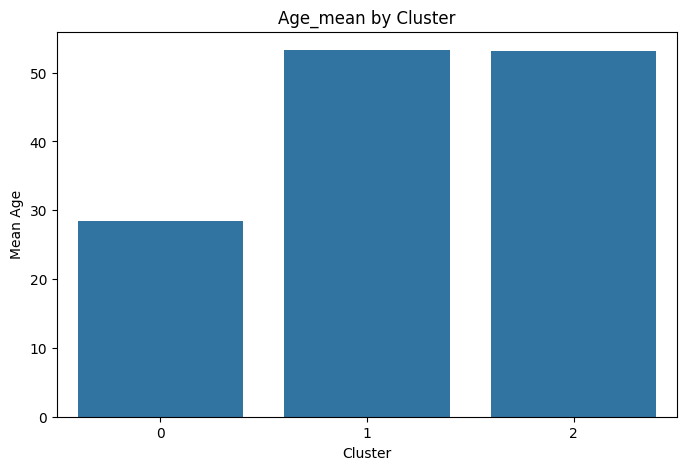

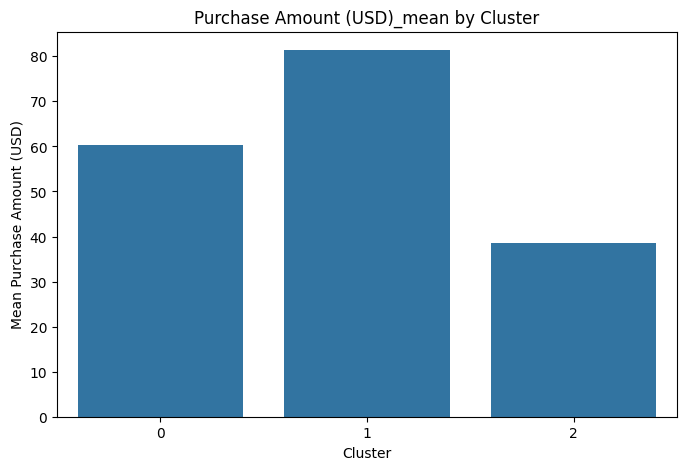

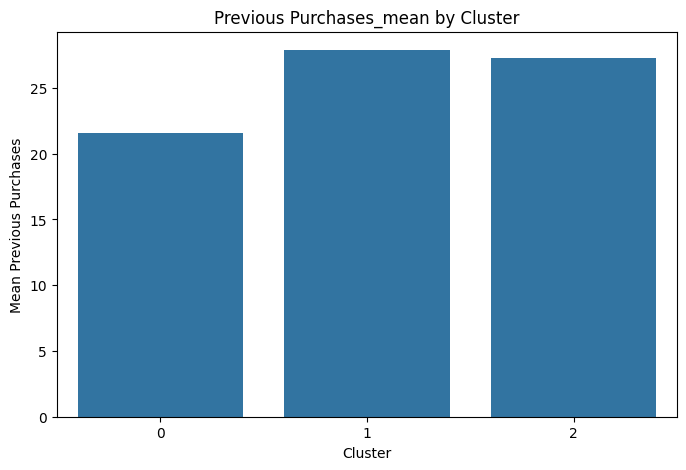

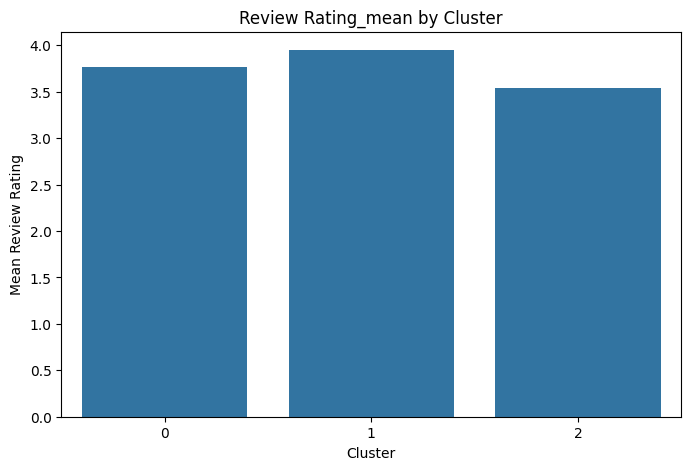

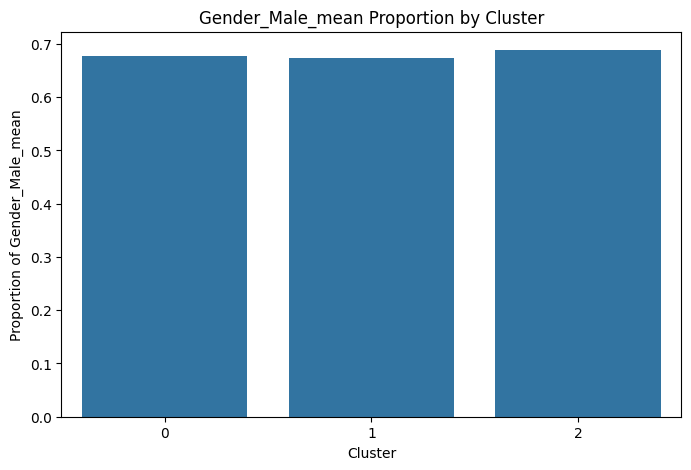

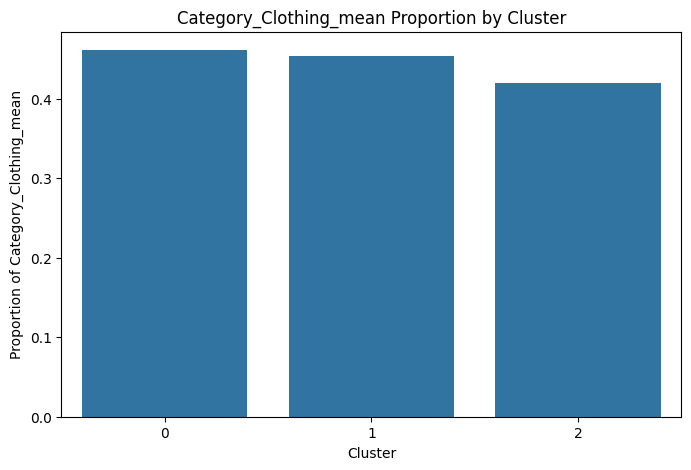

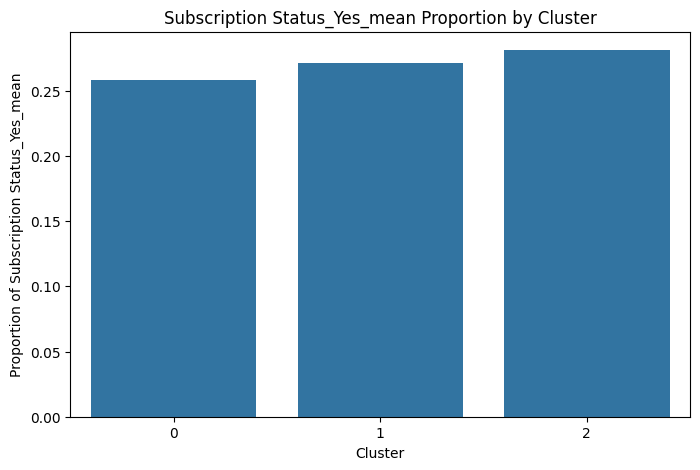

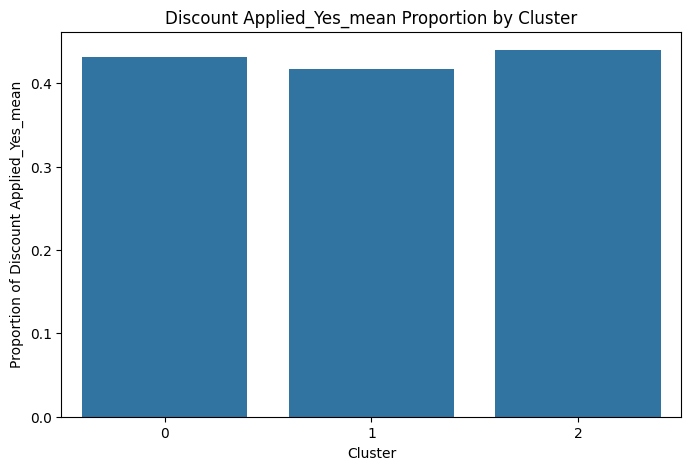

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze cluster characteristics
cluster_characteristics = df.groupby('Cluster').agg({
    'Age': ['mean', 'median'],
    'Purchase Amount (USD)': ['mean', 'median'],
    'Previous Purchases': ['mean', 'median'],
    'Review Rating': ['mean', 'median'],
    'Gender_Male': 'mean', # Use mean for one-hot encoded binary features
    'Category_Clothing': 'mean',
    'Category_Footwear': 'mean',
    'Category_Outerwear': 'mean',
    'Subscription Status_Yes': 'mean',
    'Discount Applied_Yes': 'mean',
    'Promo Code Used_Yes': 'mean',
    'Payment Method_Credit Card': 'mean',
    'Payment Method_Debit Card': 'mean',
    'Payment Method_PayPal': 'mean',
    'Payment Method_Venmo': 'mean',
    'Frequency of Purchases_Bi-Weekly': 'mean',
    'Frequency of Purchases_Every 3 Months': 'mean',
    'Frequency of Purchases_Fortnightly': 'mean',
    'Frequency of Purchases_Monthly': 'mean',
    'Frequency of Purchases_Quarterly': 'mean',
    'Frequency of Purchases_Weekly': 'mean'
}).reset_index()

# Flatten the multi-level column names
cluster_characteristics.columns = ['_'.join(col).strip('_') for col in cluster_characteristics.columns.values]

display("Cluster Characteristics:")
display(cluster_characteristics)

# Visualize key numerical features by cluster
numerical_features = ['Age_mean', 'Purchase Amount (USD)_mean', 'Previous Purchases_mean', 'Review Rating_mean']
for col in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Cluster', y=col, data=cluster_characteristics)  # Changed to barplot for mean values
    plt.title(f'{col} by Cluster')
    plt.ylabel(f'Mean {col.replace("_mean", "")}') # Update y-label for clarity
    plt.show()

# Visualize key categorical features by cluster (showing proportions)
categorical_features_to_plot = ['Gender_Male_mean', 'Category_Clothing_mean', 'Subscription Status_Yes_mean', 'Discount Applied_Yes_mean']
for col in categorical_features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Cluster', y=col, data=cluster_characteristics)
    plt.title(f'{col} Proportion by Cluster')
    plt.ylabel(f'Proportion of {col}')
    plt.show()

## Summary:

### Data Analysis Key Findings

Based on the K-Means clustering with K=3, the following distinct customer segments were identified:

*   **Cluster 0:** This cluster appears to represent a younger demographic (average age around 28) with moderate purchase amounts and previous purchases.
*   **Cluster 1:** This cluster consists of an older demographic (average age around 53) with the highest average purchase amounts and a higher number of previous purchases compared to Cluster 0.
*   **Cluster 2:** This cluster also represents an older demographic (average age around 53), similar to Cluster 1, but with the lowest average purchase amounts. They have a similar number of previous purchases as Cluster 1.

The visualization of categorical features by cluster (Gender, Category, Subscription Status, Discount Applied) shows some variations in proportions across the clusters, which further helps in understanding the characteristics of each segment.

### Insights or Next Steps

*   The identified clusters can be used for targeted marketing campaigns and personalized recommendations.
*   Further analysis could involve exploring other features or using different clustering algorithms to refine the segmentation.
*   Investigating the reasons behind the lower purchase amounts in Cluster 2 compared to Cluster 1, despite similar age and previous purchase behavior, could provide valuable insights.

This concludes the clustering task. The segmented data with the 'Cluster' column is available in the DataFrame `df` for further use.